In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../diabetes.csv")

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
print("Mean for every column::::\n ", df.describe().loc['mean'])

Mean for every column::::
  Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64


In [18]:
print("Median for every column::::\n ", df.describe().loc['50%'])

Median for every column::::
  Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Name: 50%, dtype: float64


In [17]:
print("Skewness Coeffecient::::")
df.corr()

Skewness Coeffecient::::


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

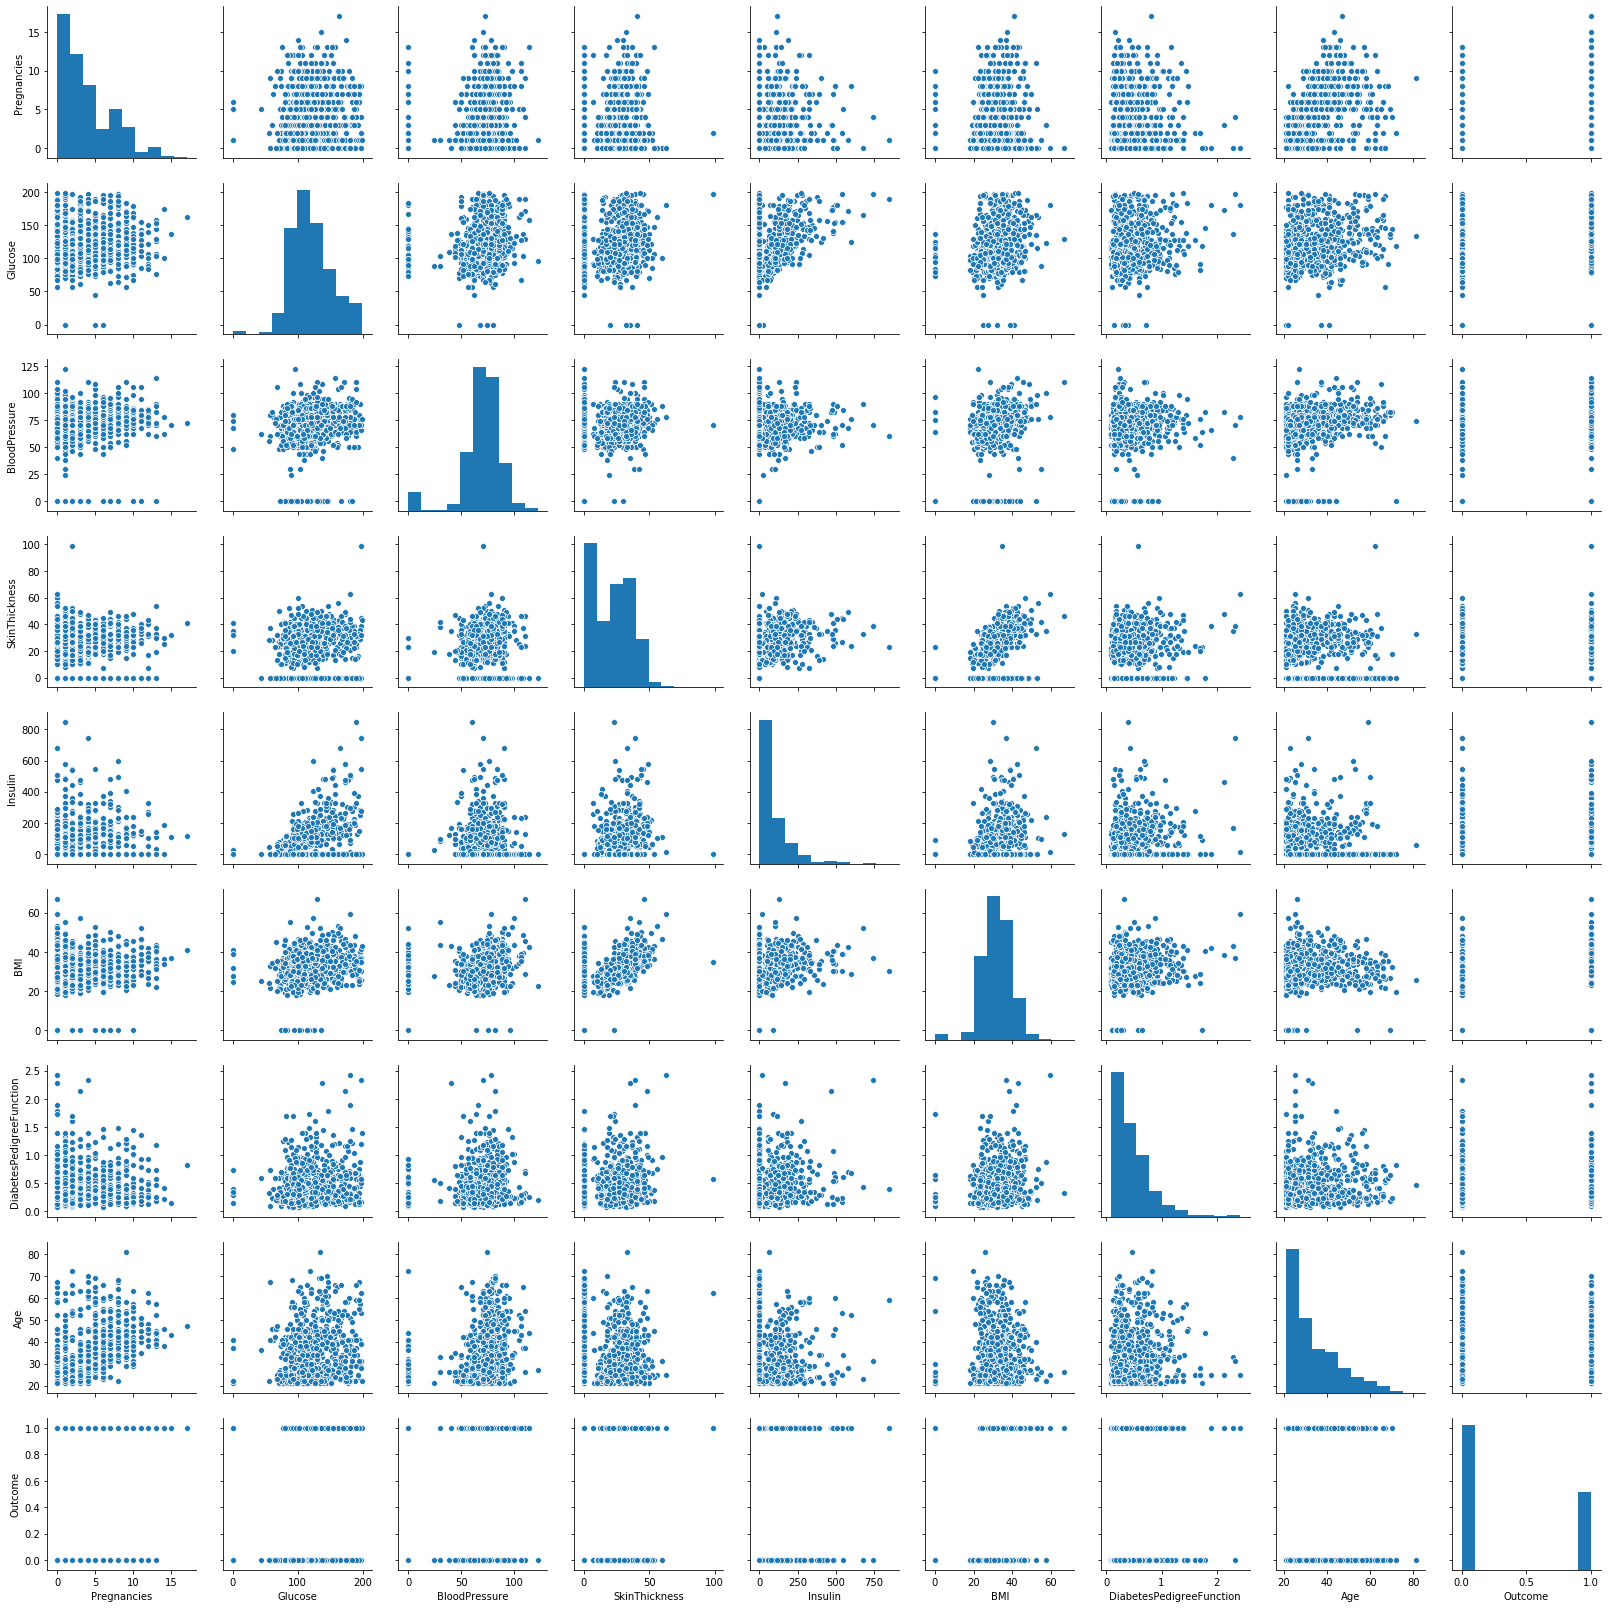

In [21]:
sns.pairplot(df)

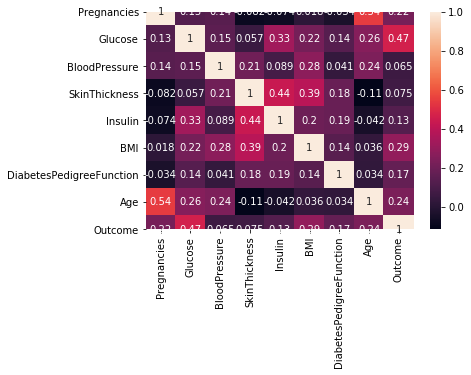

In [27]:
sns.heatmap(df.corr(), annot=True)

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
Features = ['Pregnancies', 'Age', 'Insulin', 'DiabetesPedigreeFunction', 'BMI']
Label = ['Outcome']

In [66]:
X = df[Features]
Y = df[Label]

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold

In [68]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=150, random_state=77)

In [69]:
kfold = KFold(n_splits= 19, random_state=77)

In [70]:
cv_model = cross_validate(rfc, X, Y, cv=kfold, return_train_score=True, return_estimator=True)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

In [63]:
cv_model

{'fit_time': array([0.24941516, 0.23885298, 0.2088728 , 0.25584245, 0.33087301,
        0.24885035, 0.26054525, 0.2218678 , 0.25184846, 0.2192204 ,
        0.29981494, 0.23285222, 0.24884582, 0.20587516, 0.29881334,
        0.24284983, 0.22386122, 0.20287251, 0.27083826]),
 'score_time': array([0.01698732, 0.0179882 , 0.02198458, 0.0169878 , 0.02098727,
        0.01698923, 0.02098656, 0.0189867 , 0.01599026, 0.01755929,
        0.02298594, 0.0169909 , 0.01698804, 0.02258897, 0.02098632,
        0.01699018, 0.02098608, 0.0229876 , 0.0175519 ]),
 'estimator': (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=5, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=150,
                         n_jobs=None, oob_score=False, random_s

In [71]:
print("Average Test Score::::")
cv_model['test_score'].mean()

Average Test Score::::


0.719191270860077

In [48]:
list(zip(cv_model['test_score'], cv_model['train_score'], (cv_model['train_score']-cv_model['test_score'])*100))

[(0.7532467532467533, 0.7872648335745297, 3.4018080327776423),
 (0.6753246753246753, 0.7858176555716353, 11.049298024695997),
 (0.7272727272727273, 0.7916063675832128, 6.43336403104855),
 (0.6233766233766234, 0.8031837916063675, 17.98071682297442),
 (0.6883116883116883, 0.804630969609262, 11.631928129757362),
 (0.6883116883116883, 0.8017366136034733, 11.342492529178493),
 (0.7142857142857143, 0.8118668596237337, 9.758114533801942),
 (0.7402597402597403, 0.7945007235890015, 5.424098332926119),
 (0.6973684210526315, 0.7904624277456648, 9.309400669303326),
 (0.6842105263157895, 0.7947976878612717, 11.05871615454822)]